# Managing and analyzing chromatograpfic data

In [1]:
%reload_ext autoreload
%autoreload 2
from chromatopy.tools import ChromAnalyzer
from chromatopy.tools.calibration import Calibrator

# Imports for plotting
from utility import plot_measurments

## Experimental scenario

The chromatograpfic experiments of a day consists of the following measurements:
1. 10 samples of a substrate standard in the concentration range of 0.05 to 1 $mmol \cdot L^{-1}$
2. Kinetic measurements
    - 6 samples of a substrate with an inital concentration of 1.78 $mmol \cdot L^{-1}$ and co-substrate of 10 $mmol \cdot L^{-1}$
    - 6 samples of a substrate with an inital concentration of 3.12 $mmol \cdot L^{-1}$ and co-substrate of 10 $mmol \cdot L^{-1}$

Samples were taken in 1 min intervals for 5 min.

### Retention time table

| Species | Retention time (min) |
|---------|-----------------------|
| Substrate | 21.35 |
| Co-substrate | 4.2 |
| Product | 5.1 |


## Data preparation

All output files of the HPLC are deposited in `data` folder. Therein, the calibration data is located in `calibration` folder and the kinetic data in `kinetic` folder. Each folder within `kinetic` contains the measurement data for the time-course series of one experimental condition.

### Calibration data

In [15]:
# Define data paths
calibration_path = "data/calibration"

# Load data with ChromAnalyzer
calib_analyzer = ChromAnalyzer.read_data(calibration_path)

# plot the calibration data
plot_measurments(calib_analyzer.measurements)

After all files from the `calibration` directory were loaded to the `ChromAnalyzer`, an `Analyte` can be added to the ChromAnalyzer. By using the `add_analyte()` method the characteristic retention time of the analyte is defined. Furthermore, a name and the Chebi ID of the analyte are provided, simultaniously defining meta-data.

In [12]:
# Collect all peaks belonging to the substrate and combine them to a species
substrate_analyte = calib_analyzer.add_analyte(
    name="Substrate", retention_time=21.35, chebi=176425
)

### Create a `Calibrator` for concentration calculation

The `Calibrator` of `chromatopy` was already imported in the first cell of this document. In the following cell, it is used to create a calibration object which can be used to calculate the concentration of the substrate in the kinetic experiments.

✅ Calibration model created.
R²: 0.9997


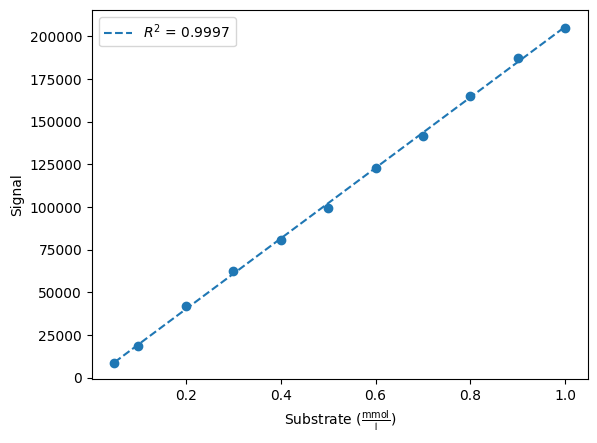

In [14]:
# Define concentrations and corresponding unit
concentrations = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
conc_unit = "mmol/L"

# Create a calibrator for the substrate
substrate_calibrator = Calibrator.from_analyte(
    analyte=substrate_analyte, concentrations=concentrations, conc_unit=conc_unit
)

# Plot the calibration curve
substrate_calibrator.plot()

## Read in kinetic data

It is advised to group chromatographic data in folder 

In [ ]:
# Define path to data

cond1_path = "data/kinetic/substrate_10mM_co-substrate3.12mM"
cond2_path = "data/kinetic/substrate_10mM_co-substreate1.78mM"

# Define species present in the kinetic measurements

catalyst = Species

## Read in data from paths

In [ ]:
time_unit = "min"
sah_time = [0, 60, 120, 180, 240, 300]
soph_time = [0, 60, 120, 180, 240, 300, 360]

calibration = ChromAnalyzer.read_data(calibration_path)
sah = ChromAnalyzer.read_data(sah_path)
soph = ChromAnalyzer.read_data(soph_path)

# add reaction time to measurements
sah.add_reaction_time(sah_time, time_unit)
soph.add_reaction_time(soph_time, time_unit)

NameError: name 'sah_path' is not defined

## Visualize data

In [ ]:
# Visualization of the unprocessed calibration chromatograms
plot_measurments(calibration.measurements)
plot_measurments(sah.measurements)
plot_measurments(soph.measurements)

## Define the analyte

In [ ]:
# get peaks for calibration data
soph_calibration_measurements = calibration.add_analyte(
    inchi="ZTOKUMPYMPKCFX-CZNUEWPDSA-N",
    name="Sophorolipid",
    retention_time=21.33,
)

soph_concentrations = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

soph_calibrator = Calibrator.from_analyte(
    analyte=soph_calibration_measurements,
    concentrations=soph_concentrations,
    conc_unit="mmol/L",
)

✅ Calibration model created.
R²: 0.9997


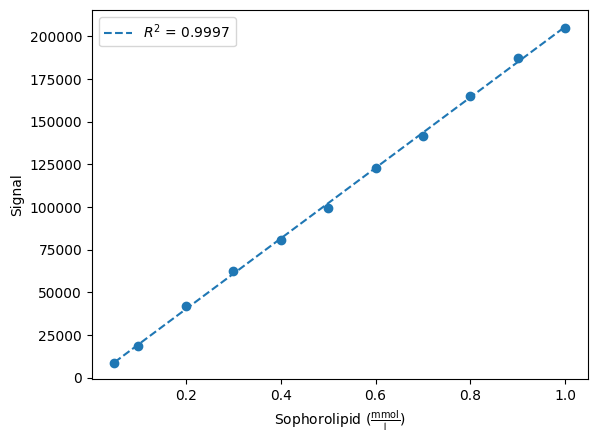

In [ ]:
# plot the calibration curve for sophorolipid
soph_calibrator.plot()

## Create `Calibrator` for product

In [ ]:
product_calibrator = Calibrator(
    name="Product", slope=199030, conc_unit="mmol/l")

/Users/max/Documents/GitHub/chromatopy/chromatopy/tools/calibration.py:54: UserWarning:

No value for 'inchi' provided; Consider setting a value for 'inchi'.



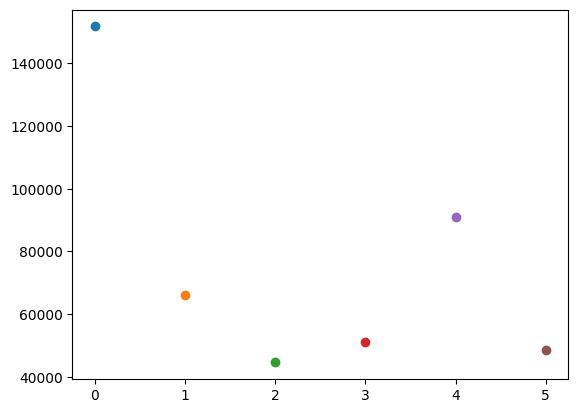

In [ ]:
product = sah.add_analyte("product", 24.4)

for p_id, peak in enumerate(product.peaks):
    plt.scatter(p_id, peak.area)

## Create calibration object

In [ ]:
standard = Calibrator(
    species_id="calibration",
    concentrations=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    signals=[peak.area for peak in calib_analyte.peaks],
    conc_unit="mmol/L",
)

standard.calibrate()

standard.plot()

NameError: name 'calib_analyte' is not defined

## Calculate the concentration of the analyte

In [ ]:
another_standrard = Calibrator(species_id="name", slope=0.346, conc_unit="mM")

In [ ]:
soph.measurements[0].chromatograms[0].peaks[0].timestamp

NameError: name 'soph' is not defined

In [ ]:
last_peak = "sophorolipid"
peak_at_20 = "product"
slope_product = 199030
interval = 1
sucrose = 10  # mM
sopho = 20  # mM


# accourt for dilution

In [ ]:
from sdRDM.base.datatypes import Unit

In [ ]:
Unit.from_string("mmol/l")

Unit(id='26cff73e-7bab-41d6-9196-6e821aeb7c18', name='mmol / l', bases=[BaseUnit(scale=0.001, kind=Unit("mol"), exponent=1.0), BaseUnit(scale=1.0, kind=Unit("l"), exponent=-1.0)])

In [ ]:
from chromatopy.core import Measurement

Measurement(time_unit="mm")

Measurement(id='3ac21d94-3d3e-44ef-a40a-bf68720de496', chromatograms=[], timestamp=None, reaction_time=None, time_unit=Unit(id='dbd57aa4-4590-4653-834e-1a6267472412', name='mm', bases=[BaseUnit(scale=0.001, kind=Unit("m"), exponent=1.0)]), injection_volume=None, dilution_factor=None, injection_volume_unit=None)